In [ ]:
# 2451838 : created smart contracts 
# 3186349 : burned eth
# 651463 : gas prices
# 2451710: Difference between Bought and Sold volume
# 3186427: New ERC20s
# 41840: Active Addresses
# 661161: Price

In [ ]:
# list_of_attr = [2451838, 3119805, 3186349, 2451710, 41840, 661161, 651463]

In [3]:
import datetime as dt
import pandas as pd
import matplotlib
import numpy as np
from dune_client.types import QueryParameter
from dune_client.client import DuneClient
from dune_client.query import QueryBase
import statsmodels
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# def get_new_atrr(id_code):
#     query_base = QueryBase(query_id= id_code)
#     attribute = Dune.run_query_dataframe(query= query_base, ping_frequency = 1.8) 
#     return attribute

In [ ]:
# list_of_df = []

In [ ]:
# for attr in list_of_attr:
#     list_of_df.append(get_new_atrr(attr))

In [ ]:
# data = pd.concat(list_of_df)
# data['Day'].fillna(pd.to_datetime(data['timestamp']), inplace =True)
# data['time'].fillna(pd.to_datetime(data['Day']), inplace =True)
# processed_df= data.drop(['Day',"# Sending Addresses (S)", "# Receiving Addresses (R)", "ETH_price", "timestamp", "avg_gas_price", 'df_of_volume','pct_start_price', 'change'],  axis = 1).groupby(data['time'].str.split().str[0]).sum()
# # processed_df= processed_df.sort_values('time', ascending = False).apply(pd.to_numeric, errors='coerce')
# processed_df= processed_df.groupby(processed_df['time'].str.split().str[0]).sum().drop(['time', 'Baseline'], axis=1)

In [ ]:
# processed_df= processed_df.tail(365)
# processed_df['median_gas_price'].

In [33]:
df = pd.read_csv(r"C:\Crypto_Price_Action\nd.csv")
df= df.groupby(df['time'].str.split().str[0]).sum().drop(['time', 'Baseline'], axis=1)
df= df.tail(365)


,Unnamed: 0,created_contracts,cum_created_contracts,burned,avg_gas_price,median_gas_price,ETH_price,change,pct_start_price,MA(30) ETH price,MA(14) ETH price,volume,df_of_volume,# Sending Addresses (S),# Receiving Addresses (R),# Total Addresses,S/R Ratio,price,burned1
Unnamed: 0,1.000000,0.259336,-0.995972,0.026263,NaN,NaN,-0.574281,-0.574281,-0.574281,-0.624792,-0.598401,0.040141,0.234243,0.195691,-0.031211,0.215617,0.216514,-0.574281,0.082138
created_contracts,0.259336,1.000000,-0.257295,-0.078760,NaN,NaN,-0.311698,-0.311698,-0.311698,-0.265973,-0.278370,-0.292580,0.012889,-0.017034,-0.369735,-0.047005,0.149241,-0.311698,-0.234261
cum_created_contracts,-0.995972,-0.257295,1.000000,-0.022808,NaN,NaN,0.576336,0.576336,0.576336,0.629414,0.601632,-0.042093,-0.235698,-0.209675,0.025354,-0.229145,-0.225141,0.576336,-0.077780
burned,0.026263,-0.078760,-0.022808,1.000000,NaN,NaN,0.067384,0.067384,0.067384,0.076249,0.078424,0.048333,-0.063930,-0.036579,0.059858,-0.023720,-0.054934,0.067384,0.199565
avg_gas_price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_gas_price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ETH_price,-0.574281,-0.311698,0.576336,0.067384,NaN,NaN,1.000000,1.000000,1.000000,0.880682,0.940679,0.123350,-0.210017,-0.185782,0.331126,-0.159462,-0.341567,1.000000,0.395614
change,-0.574281,-0.311698,0.576336,0.067384,NaN,NaN,1.000000,1.000000,1.000000,0.880682,0.940679,0.123350,-0.210017,-0.185782,0.331126,-0.159462,-0.341567,1.000000,0.395614
pct_start_price,-0.574281,-0.311698,0.576336,0.067384,NaN,NaN,1.000000,1.000000,1.000000,0.880682,0.940679,0.123350,-0.210017,-0.185782,0.331126,-0.159462,-0.341567,1.000000,0.395614
MA(30) ETH price,-0.624792,-0.265973,0.629414,0.076249,NaN,NaN,0.880682,0.880682,0.880682,1.000000,0.967168,0.058156,-0.247301,-0.199619,0.276696,-0.181547,-0.322911,0.880682,0.438285


In [23]:
# time_horizon= len(pd.date_range(dt.date(2022, 9, 15) , dt.date.today()))
# number of days since the eth merge September 15, 2022.
# .drop(["pct_price","change","pct_start_price","ETH_price"], axis =1)

In [35]:
Y = df.sort_values('time')['price'].shift(-1).rename('price_pred_tmr')
X = df.drop(['MA(14) ETH price', "change", "avg_gas_price", "median_gas_price", "ETH_price", "pct_start_price", "Unnamed: 0", "burned", "# Sending Addresses (S)", , "df_of_volume"],   axis = 1)
X.corr()

,created_contracts,cum_created_contracts,MA(30) ETH price,volume,# Total Addresses,S/R Ratio,price,burned1
created_contracts,1.000000,-0.257295,-0.265973,-0.292580,-0.047005,0.149241,-0.311698,-0.234261
cum_created_contracts,-0.257295,1.000000,0.629414,-0.042093,-0.229145,-0.225141,0.576336,-0.077780
MA(30) ETH price,-0.265973,0.629414,1.000000,0.058156,-0.181547,-0.322911,0.880682,0.438285
volume,-0.292580,-0.042093,0.058156,1.000000,0.033721,-0.109244,0.123350,0.189010
# Total Addresses,-0.047005,-0.229145,-0.181547,0.033721,1.000000,0.895732,-0.159462,-0.048171
S/R Ratio,0.149241,-0.225141,-0.322911,-0.109244,0.895732,1.000000,-0.341567,-0.180629
price,-0.311698,0.576336,0.880682,0.123350,-0.159462,-0.341567,1.000000,0.395614
burned1,-0.234261,-0.077780,0.438285,0.189010,-0.048171,-0.180629,0.395614,1.000000


In [25]:
X_train = X.iloc[ : int(0.8*len(X))].fillna(0)
X_test =  X.iloc[int(0.8*len(X)) : -1]
Y_train = Y.iloc[ : int(0.8*len(Y))].fillna(0)
Y_test =  Y.iloc[int(0.8*len(Y)) : -1]

In [26]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, shuffle = False)

In [27]:
X_train

,created_contracts,cum_created_contracts,MA(30) ETH price,volume,# Total Addresses,S/R Ratio,price,burned1
time,,,,,,,,
2022-12-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-12-06,-0.032818,0.001384,-0.009703,-0.069701,0.003680,-0.047872,-0.017975,0.000000
2022-12-07,0.095738,0.001515,-0.009665,-0.072736,-0.090913,-0.033520,-0.013834,0.000000
2022-12-08,-0.103832,0.001355,-0.008672,0.073696,-0.003991,0.000000,0.004185,0.000000
2022-12-09,-0.412599,0.000795,-0.004772,-0.161924,2.761005,3.606936,0.024996,0.000000
...,...,...,...,...,...,...,...,...
2023-09-18,-0.546098,0.000540,-0.000710,1.087074,0.083928,-0.005882,0.007015,-0.202416
2023-09-19,-0.310696,0.000372,-0.000489,-0.093568,0.029385,-0.041420,0.001229,0.000000
2023-09-20,-0.211110,0.000293,-0.000821,-0.080068,0.007508,0.012346,-0.006187,0.000000


In [28]:
model = sm.OLS(Y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         price_pred_tmr   R-squared (uncentered):                   0.050
Model:                            OLS   Adj. R-squared (uncentered):              0.023
Method:                 Least Squares   F-statistic:                              1.855
Date:                Mon, 04 Dec 2023   Prob (F-statistic):                      0.0670
Time:                        23:42:11   Log-Likelihood:                          737.93
No. Observations:                 292   AIC:                                     -1460.
Df Residuals:                     284   BIC:                                     -1430.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
created_contracts        -0.0001      0.002     -0.063      0.950      -0.004       0.003
cum_created_contracts     1.5333      1.874      0.818      0.414      -2.156       5.222
MA(30) ETH price         -0.1297      0.311     -0.417      0.677      -0.742       0.482
volume                   -0.0004      0.003     -0.121      0.904      -0.006       0.006
# Total Addresses         0.0012      0.017      0.070      0.944      -0.032       0.035
S/R Ratio                -0.0010      0.014     -0.072      0.943      -0.028       0.026
price                     0.2213      0.060      3.698      0.000       0.104       0.339
burned1                   0.0011      0.009      0.122      0.903      -0.017       0.019
==============================================================================
Omnibus:                       47.442   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.006
Skew:                           0.747   Prob(JB):                     1.18e-27
Kurtosis:                       5.821   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='time'>

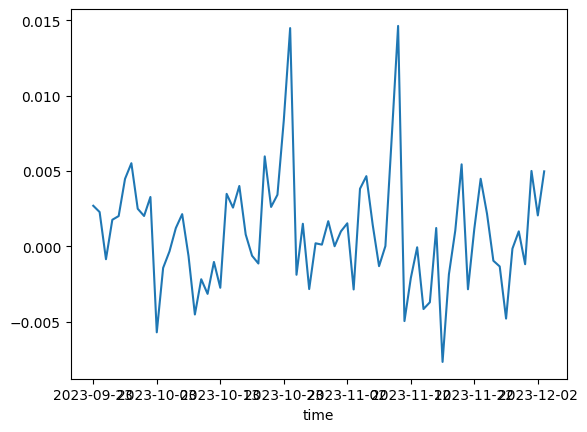

In [29]:
model.predict(X_test).plot()

<Axes: xlabel='time'>

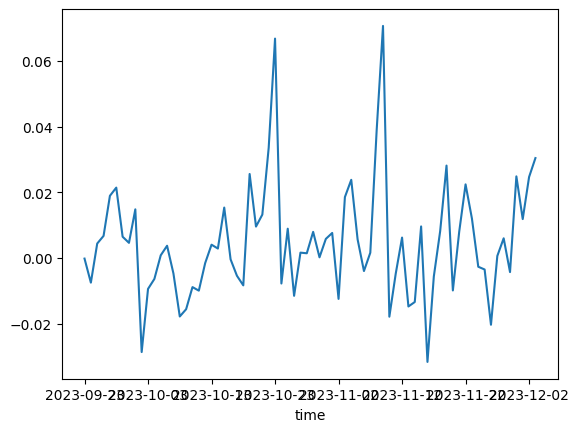

In [31]:
Y_test.plot()

In [30]:
# processed_df.drop(["Baseline", "MA(14) ETH price", "# Receiving Addresses (R)", "Baseline", "pct_start_price", "change", "timestamp"], axis =1).to_csv(r"C:\Users\amali\OneDrive\Desktop\data.csv")

In [ ]:
# processed_df['median_gas_price'].rolling(8).sum()